In [1]:
from openTSNE import TSNE
from resources import utils
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
#Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=42)
faces = dataset.data
n_samples, n_features = faces.shape


In [3]:
targets = dataset.target
X_train, X_test, y_train, y_test=train_test_split(faces, targets, test_size=0.3, stratify=targets, random_state=0)


## PCA

In [4]:
# pca
pca = decomposition.PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)

X_pca = pca.transform(X_test)


clf = LinearDiscriminantAnalysis()
clf.fit(X_train_pca, y_train)
Y_pca = clf.predict(X_pca)
print(accuracy_score(y_test, Y_pca))

0.7833333333333333


## MDS

In [8]:
mds = MDS(n_components=10)
X_mds = mds.fit_transform(faces)

# distribuimos una vez todo el data set transformado porque no esta el método .transform
X_train_mds, X_test_mds, y_train, y_test=train_test_split(X_mds, targets, test_size=0.3, stratify=targets, random_state=0)

clf = LinearDiscriminantAnalysis()
clf.fit(X_train_mds, y_train)
Y_mds = clf.predict(X_test_mds)
print(accuracy_score(y_test, Y_mds))

0.775


## ISOMAP

In [7]:
embedding = Isomap(n_components=10,n_neighbors=12)
X_train_isomap = embedding.fit_transform(X_train)

X_isomap = embedding.transform(X_test)


clf = LinearDiscriminantAnalysis()
clf.fit(X_train_isomap, y_train)
Y_isomap = clf.predict(X_isomap)
print(accuracy_score(y_test, Y_isomap))

0.6666666666666666


## LLE

In [9]:
embedding = LocallyLinearEmbedding(n_components=10,n_neighbors=12)
X_train_lle = embedding.fit_transform(X_train)

X_lle = embedding.transform(X_test)


clf = LinearDiscriminantAnalysis()
clf.fit(X_train_lle, y_train)
Y_lle = clf.predict(X_lle)
print(accuracy_score(y_test, Y_lle))


0.6083333333333333


## TSNE de Open TSNE

In [38]:
tsne2 = TSNE(perplexity = 30, early_exaggeration = 12, initialization='pca', verbose = True,n_components=10)

X_tsne = tsne2.fit(faces)

# distribuimos una vez todo el data set transformado porque no esta el método .transform
X_train_tsne, X_test_tsne, y_train, y_test=train_test_split(X_tsne, targets, test_size=0.3, stratify=targets, random_state=0)

clf = LinearDiscriminantAnalysis()
clf.fit(X_train_tsne, y_train)
Y_tsne = clf.predict(X_test_tsne)
print(accuracy_score(y_test, Y_tsne))


--------------------------------------------------------------------------------
TSNE(n_components=10, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.04 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.03 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 2.4384, 50 iterations in 9.8550 sec
Iteration  100, KL divergence 2.4181, 50 iterations in 7.8909 sec
Iteration  150, KL divergence 2.4075, 50 iterations in 6.8404 sec
Iteration  200, KL divergence 2.4070, 50 iterations in 6.8835 sec
Iteration  250, KL divergence 2.4069, 50 iterations in 7.4423 sec
   --> Time elapsed: 38.91 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 500 iterations...
Iteratio

## TSNE de sklearn

In [45]:
from sklearn.manifold import TSNE as TSNEsk

tsne2 = TSNEsk(n_components=10,method="exact") # el otro metodo no me deja con más de 4 componentes

X_tsne = tsne2.fit_transform(faces)

# distribuimos una vez todo el data set transformado porque no esta el método .transform
X_train_tsne, X_test_tsne, y_train, y_test=train_test_split(X_tsne, targets, test_size=0.3, stratify=targets, random_state=0)

clf = LinearDiscriminantAnalysis()
clf.fit(X_train_tsne, y_train)
Y_tsne = clf.predict(X_test_tsne)
print(accuracy_score(y_test, Y_tsne))

0.15833333333333333


## Ahora vamos a iterar el numero de componentes 


## PCA

Text(0.5, 1.0, 'evolucion accuracy')

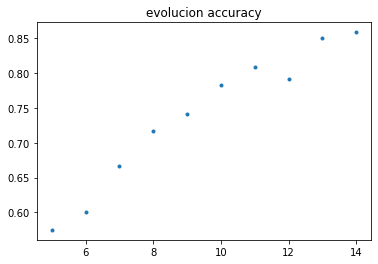

In [20]:
res = []
s = []
for n in range ( 5,15):
    pca = decomposition.PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)

    X_pca = pca.transform(X_test)


    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train_pca, y_train)
    Y_pca = clf.predict(X_pca)
    res.append(accuracy_score(y_test, Y_pca))
    s.append(n)
plt.plot(s,res,".")
plt.title("evolucion accuracy")

## MDS

Text(0.5, 1.0, 'evolucion accuracy')

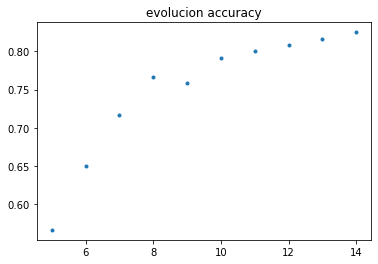

In [26]:
res = []
s = []
for n in range ( 5,15):
    mds = MDS(n_components=n)
    X_mds = mds.fit_transform(faces)

    # distribuimos una vez todo el data set transformado porque no esta el método .transform
    X_train_mds, X_test_mds, y_train, y_test=train_test_split(X_mds, targets, test_size=0.3, stratify=targets, random_state=0)

    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train_mds, y_train)
    Y_mds = clf.predict(X_test_mds)
    res.append(accuracy_score(y_test, Y_mds))
    s.append(n)
plt.plot(s,res,".")
plt.title("evolucion accuracy")

##  Isomap

Text(0.5, 1.0, 'evolucion accuracy')

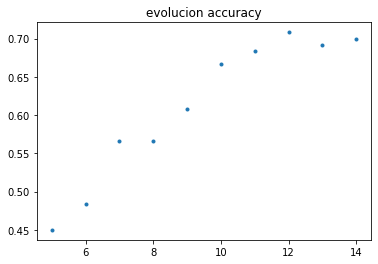

In [27]:
res = []
s = []
for n in range ( 5,15):
    embedding = Isomap(n_components=n,n_neighbors=12)
    X_train_isomap = embedding.fit_transform(X_train)

    X_isomap = embedding.transform(X_test)


    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train_isomap, y_train)
    Y_isomap = clf.predict(X_isomap)
    res.append(accuracy_score(y_test, Y_isomap))
    s.append(n)
plt.plot(s,res,".")
plt.title("evolucion accuracy")

## LLE

Text(0.5, 1.0, 'evolucion accuracy')

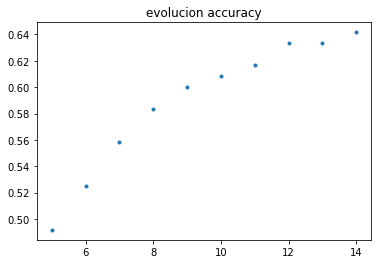

In [28]:
res = []
s = []
for n in range ( 5,15):
    embedding = LocallyLinearEmbedding(n_components=n,n_neighbors=12)
    X_train_lle = embedding.fit_transform(X_train)

    X_lle = embedding.transform(X_test)


    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train_lle, y_train)
    Y_lle = clf.predict(X_lle)
    res.append(accuracy_score(y_test, Y_lle))
    s.append(n)
plt.plot(s,res,".")
plt.title("evolucion accuracy")


## TSNE 1

In [47]:
# tardaa mucho en compilar
res = []
s = []
for n in range ( 5,15):

    tsne2 = TSNE(perplexity = 30, early_exaggeration = 12, initialization='pca',n_components=n,random_state=0)

    X_tsne = tsne2.fit(faces)

    # distribuimos una vez todo el data set transformado porque no esta el método .transform
    X_train_tsne, X_test_tsne, y_train, y_test=train_test_split(X_tsne, targets, test_size=0.3, stratify=targets, random_state=0)

    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train_tsne, y_train)
    Y_tsne = clf.predict(X_test_tsne)
    res.append(accuracy_score(y_test, Y_tsne))
    s.append(n)
plt.plot(s,res,".")
plt.title("evolucion accuracy")



KeyboardInterrupt



## TSNE 2 

Este algortimo no me deja iterar para valores de n_componentes mayores que 4

In [ ]:
# tampoco lo he corrido por la cantidad de tiempo que necesita

# es
res = []
s = []
for n in range ( 5,15):

    tsne2 = TSNEsk(n_components=n,method="exact")

    X_tsne = tsne2.fit_transform(faces)

    # distribuimos una vez todo el data set transformado porque no esta el método .transform
    X_train_tsne, X_test_tsne, y_train, y_test=train_test_split(X_tsne, targets, test_size=0.3, stratify=targets, random_state=0)

    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train_tsne, y_train)
    Y_tsne = clf.predict(X_test_tsne)
    res.append(accuracy_score(y_test, Y_tsne))
    s.append(n)
plt.plot(s,res,".")
plt.title("evolucion accuracy")

Vemos que los metodos mejorar su precision cuanto más grande es el número de componentes